# Simulations of CANS and Independent Growth

## The Model

The figure below shows a schematic of our initial
approach to constructing a competition for nutrients and signalling
(CANS) model. Each culture, $i$, on a plate is associated with three
variables: one observed variable, $C_{i}$, the amount of cells, and
two hidden variables, $N_{i}$ and $S_{i}$, the amount of nutrients
and signal. Cultures in QFA and SGA agars are arranged in a
rectangular array. Initially, we construct a network diffusion model for an
entire plate with diffusion occurring directly between only the four
closest neighbours of each culture, indicated by the darker blue
circles. Assuming a well stirred
mixture, we begin by describing nutrient dependent growth of each
culture using mass action kinetics and the reaction equation, 

$$N + C \xrightarrow[]{r_{i}} 2C,$$
$$rate = r_{i}[N][C]$$

where, $r_{i}$ is a growth constant (units $M^{-1}s^{-1}$), $C$ is a cell, $N$ is an amount of nutrients required for a cell to divide, and [~] are concentrations.

<img src="../../images/square_array.png">

As a first approach, assuming that the number of cells
is continuous, we incorporate the effect of signal molecules on
growth and the diffusion of both signal molecules and nutrients using
the following ODEs (CANS model):

$$
\frac{dC_{i}}{dt} = r_{i}N_{i}C_{i} - \beta S_{i}\\
\frac{dN_{i}}{dt} = - r_{i}N_{i}C_{i} - k_{n}\sum_{j \epsilon \delta_i}(N_{i} - N_{j})\\
\frac{dS_{i}}{dt} = \alpha C_{i} - k_{s}\sum_{j \epsilon \delta_i}(S_{i} - S_{j})
$$

where, $\delta_{i}$ indicates the set of closest neighbours, $k_{n}$
and $k_{s}$ are nutrient and signal diffusion constants, $\alpha$
is a rate constant for signal secretion, and $\beta$ is a constant
for the effect of signal on culture population. The independent model is a special case with $k_{n}$ and $k_{s}$ set to zero.

In [1]:
from IPython.display import Image
Image(filename='../ipynb_images/square_array.png')

FileNotFoundError: [Errno 2] No such file or directory: '../ipynb_images/square_array.png'

## Simulations of the model

We now simulate the CANS and independent models for a 3x3 plate.

Using functions from the cans package we define the dimensions of the plate and generate
initial species amounts and model parameters. We also define a set of
time points for observations.

In [20]:
%matplotlib inline
from cans.cans import *
from cans.cans_plot import *

In [25]:
rows = 3
cols = 3
no_cultures = rows*cols
neighbourhood = find_neighbourhood(rows, cols)
cans_params = gen_params(no_cultures)
init_amounts = gen_amounts(no_cultures)
times = np.linspace(0, 20, 201)

### Parameters

Paramters are in a list of the form,

[kn, ks, r0, b0, a0, r1, b1, a1, ...]

where each culture has 

In the blow plots, rate constants $r_{i}$ are sampled form a $N(1, 1)$ distribution with negative values rounded to zero.
Other constants are manually set.

In [26]:
print("CANS Parameters\n",cans_params)

CANS Parameters
 [ 0.1         0.1         0.72051383  0.05        0.05        0.09386259
  0.05        0.05        2.05018793  0.05        0.05        0.          0.05
  0.05        2.08813077  0.05        0.05        0.08745772  0.05        0.05
  0.65650895  0.05        0.05        1.05886806  0.05        0.05
  1.82674285  0.05        0.05      ]


### Competition and signalling (CANS)

We have set diffusion constants

$k_{n} = 0.1$

$k_{s} = 0.1$

We now simulate growth on a 3x3 plate for the CANS model.


##### Legend for simulation plots: 
- Blue: Cells
- Yellow: Nutrients
- Red: Signal

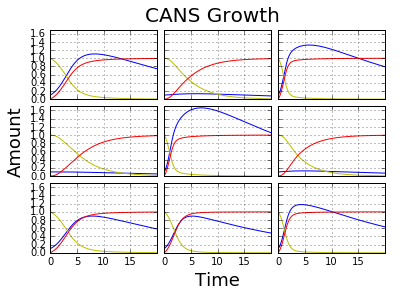

In [27]:
cans_amounts = solve_model(init_amounts, times, cans_params, neighbourhood)
plot_growth_grid(rows, cols, cans_amounts, times)

### Independence

To simulate independent growth we set the diffusion constants $k_{n}$ and $k_{s}$ to zero and run the simulation again. Other parameters (shown below) are unchanged.

Independent Parameters
 [ 0.          0.          0.72051383  0.05        0.05        0.09386259
  0.05        0.05        2.05018793  0.05        0.05        0.          0.05
  0.05        2.08813077  0.05        0.05        0.08745772  0.05        0.05
  0.65650895  0.05        0.05        1.05886806  0.05        0.05
  1.82674285  0.05        0.05      ]


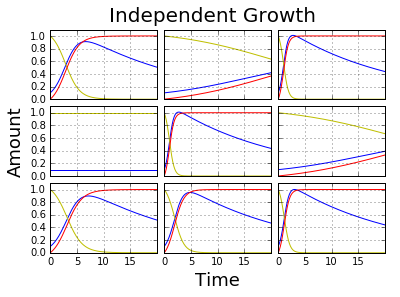

In [28]:
import copy
inde_params = copy.deepcopy(cans_params)
inde_params[:2] = 0.0
print("Independent Parameters\n", inde_params)
inde_amounts = solve_model(init_amounts, times, inde_params, neighbourhood)
plot_growth_grid(rows, cols, inde_amounts, times, title='Independent Growth')

### Results

Growth of cells (blue) is different in the CANS and independent simulations. This is due to the diffusion of nutrients (yellow) and signal (red) between cultures. We aim to see if this affects real QFA data and if so correct for it in analysis.